In [1]:
import pandas as pd
import re
from collections import defaultdict
import math
import scipy
import numpy as np

In [3]:
np.random.randint(1, 20, 10)

array([14,  3,  7, 17, 16,  4,  9, 14, 14, 19])

In [10]:
fhand = open('./raw_full.txt', 'r')
dictionary = dict()
dictionary = defaultdict(lambda: 0, dictionary)
for line in fhand:
    for word in line.split():
        dictionary[word] += 1

In [12]:
df = pd.DataFrame.from_dict(dictionary, 'index')

In [14]:
sum(df[0])

4951179

In [15]:
df.to_csv('raw_full_true_freq.csv')

In [167]:
mu, sigma = 20, 6 # mean and standard deviation
STREAM_SIZE = 10**6
s = np.random.normal(mu, sigma, STREAM_SIZE)

In [168]:
s = s[np.where(s>0)]
s = s[np.where(s<40)]
s = np.around(s).astype(int)

In [95]:
s[np.where(s<0)]

array([], dtype=int64)

In [90]:
? plt.hist

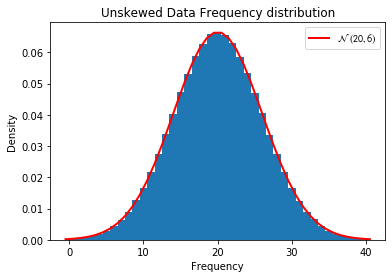

In [171]:
d = np.diff(np.unique(s)).min()
left_of_first_bin = s.min() - float(d)/2
right_of_last_bin = s.max() + float(d)/2
count, bins, ignored = plt.hist(s, np.arange(left_of_first_bin, right_of_last_bin + d, d), density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r', label=r'${\cal N\ (20, 6)}$')
plt.xlabel(r'Frequency')
plt.ylabel('Density')
plt.title('Unskewed Data Frequency distribution')
plt.legend(loc="upper right")
plt.show()

In [98]:
items = np.random.randint(1, 2**30, s.shape)

In [99]:
stream_items = np.column_stack((items,s))

In [102]:
stream_items.shape

(999112, 2)

In [66]:
type(stream_items[0][0])

numpy.int64

In [100]:
df = pd.DataFrame(stream_items)

In [101]:
df.to_csv('integer_106_true_freq.csv', index=False, header=False)

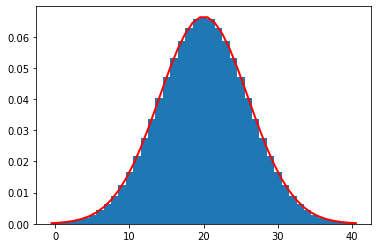

In [106]:
mu, sigma = 20, 6 # mean and standard deviation
STREAM_SIZE = 10**8
s = np.random.normal(mu, sigma, STREAM_SIZE)
s = s[np.where(s>0)]
s = s[np.where(s<40)]
s = np.around(s).astype(int)

d = np.diff(np.unique(s)).min()
left_of_first_bin = s.min() - float(d)/2
right_of_last_bin = s.max() + float(d)/2
count, bins, ignored = plt.hist(s, np.arange(left_of_first_bin, right_of_last_bin + d, d), density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

# items = np.random.randint(1, 2**30, s.shape)
# stream_items = np.column_stack((items,s))
# df = pd.DataFrame(stream_items)
# df.to_csv('integer_108_true_freq.csv', index=False, header=False)

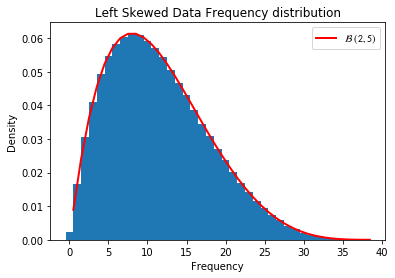

In [174]:
alpha, beta = 2, 5
STREAM_SIZE = 10**6
s = np.random.beta(alpha, beta, STREAM_SIZE) * 40
s = np.around(s).astype(int)

d = np.diff(np.unique(s)).min()
left_of_first_bin = s.min() - float(d)/2
right_of_last_bin = s.max() + float(d)/2
count, bins, ignored = plt.hist(s, np.arange(left_of_first_bin, right_of_last_bin + d, d), density=True)
B = math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha+beta)
plt.plot(bins[1:], (bins[1:]/40) ** (alpha-1) * (1-(bins[1:]/40)) ** (beta-1) / (40*B),linewidth=2, color='r', label=r'${\cal B\ (2,5)}$')
plt.xlabel(r'Frequency')
plt.ylabel('Density')
plt.title('Left Skewed Data Frequency distribution')
plt.legend(loc="upper right")
plt.show()

# items = np.random.randint(1, 2**30, s.shape)
# stream_items = np.column_stack((items,s))
# df = pd.DataFrame(stream_items)
# df.to_csv('skewed_integer_107_true_freq.csv', index=False, header=False)

In [161]:
check = pd.read_csv('./integer_106_true_freq.csv', header=None)

In [162]:
check.head

<bound method NDFrame.head of                 0   1
0       855462781  15
1        54174071   7
2        51618160  22
3       317998100  18
4       465951045  26
...           ...  ..
999107  649641344  21
999108  101534620  23
999109  996325581  17
999110  905020034  20
999111  972383239  22

[999112 rows x 2 columns]>

In [163]:
check[0].unique().shape

(998629,)

In [164]:
check.shape

(999112, 2)